## Observations and Insights 

In [38]:
%matplotlib notebook

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Merge two dataframes using an outer join
mo_st_merge_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")

# Display the data table for preview
mo_st_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
# Checking the number of mice.
# The value_counts method counts unique values in a column
count = mo_st_merge_df["Mouse ID"].value_counts()
count


g989    13
w914    10
a685    10
b742    10
k483    10
        ..
b447     1
t573     1
d133     1
n482     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [41]:
# The unique method shows every element of the series that appears only once
unique = mo_st_merge_df["Mouse ID"].unique()
unique


array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [42]:
unique_d = mo_st_merge_df["Drug Regimen"].unique()
unique_d


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mo_st_merge_df.drop_duplicates()
mo_st_merge_df. head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df= mo_st_merge_df.drop_duplicates(['Mouse ID'], keep='last')
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [45]:
# Optional: Get all the data for the duplicate mouse ID. 



In [46]:
# Checking the number of mice in the clean DataFrame.
count_of_mice = new_df["Mouse ID"].value_counts()
count_of_mice

z435    1
o287    1
p438    1
b487    1
g989    1
       ..
q511    1
i386    1
c895    1
x336    1
a262    1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Tumor = new_df['Tumor Volume (mm3)']
mean_numpy = np.mean(Tumor)
print(f"The mean tumor volume is {mean_numpy} ")

median_numpy = np.median(Tumor)
print(f"The median tumor volume is {median_numpy}")

var_numpy = np.var(Tumor,ddof = 0)
print(f"The tumor variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(Tumor,ddof = 0)
print(f"The tumor standard deviation using the NumPy module is {sd_numpy}")

# Generate a new 30 Tumor volume sample and caliculate the SEM of the sample
sample = new_df.sample(30)
print(f"The SEM value for the sample Tumor volume data is {sem(Tumor)}")


The mean tumor volume is 54.99913687738955 
The median tumor volume is 55.84141007
The tumor variance using the NumPy module is 159.50787704180308
The tumor standard deviation using the NumPy module is 12.62964279153623
The SEM value for the sample Tumor volume data is 0.801983119246071


## Bar and Pie Charts

In [48]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
###### Filter the DataFrame down only to those columns to chart
Mouse_and_Regimen = new_df[["Mouse ID","Drug Regimen"]]

####### Set the index to be "Drug Regimen" so they will be used as labels
Mouse_and_Regimen = Mouse_and_Regimen.set_index("Drug Regimen")
Mouse_and_Regimen.head()

,Mouse ID
Drug Regimen,
Ramicane,k403
Capomulin,s185
Capomulin,x401
Capomulin,m601
Ramicane,g791


<IPython.core.display.Javascript object>


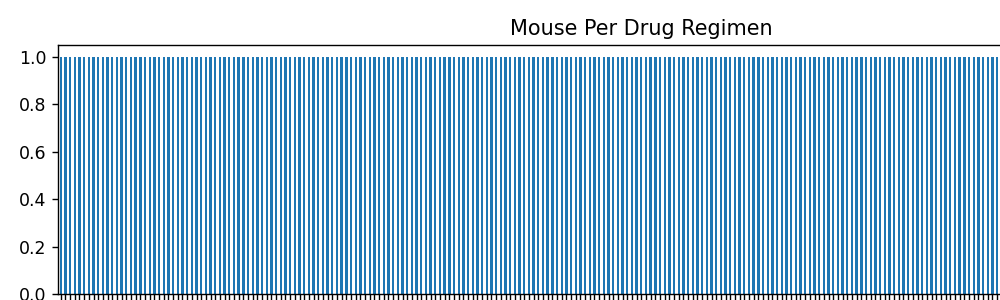

In [49]:
Mouse_and_Regimen = new_df["Mouse ID"].value_counts()
####### Configure plot and ticks
Mouse_and_Regimen.plot(kind="bar", facecolor="red")


In [50]:
###### Use DataFrame.plot() in order to create a bar chart of the data
Mouse_and_Regimen.plot(kind="bar", figsize=(10,3))
Mouse_and_Regimen = new_df["Mouse ID"].value_counts()
###### Set a title for the chart
plt.title("Mouse Per Drug Regimen")

plt.show()
plt.tight_layout()

In [51]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
######## Set x axis and tick locations
x_axis = np.arange(len(Mouse_and_Regimen))
tick_locations = [value for value in x_axis]

<IPython.core.display.Javascript object>


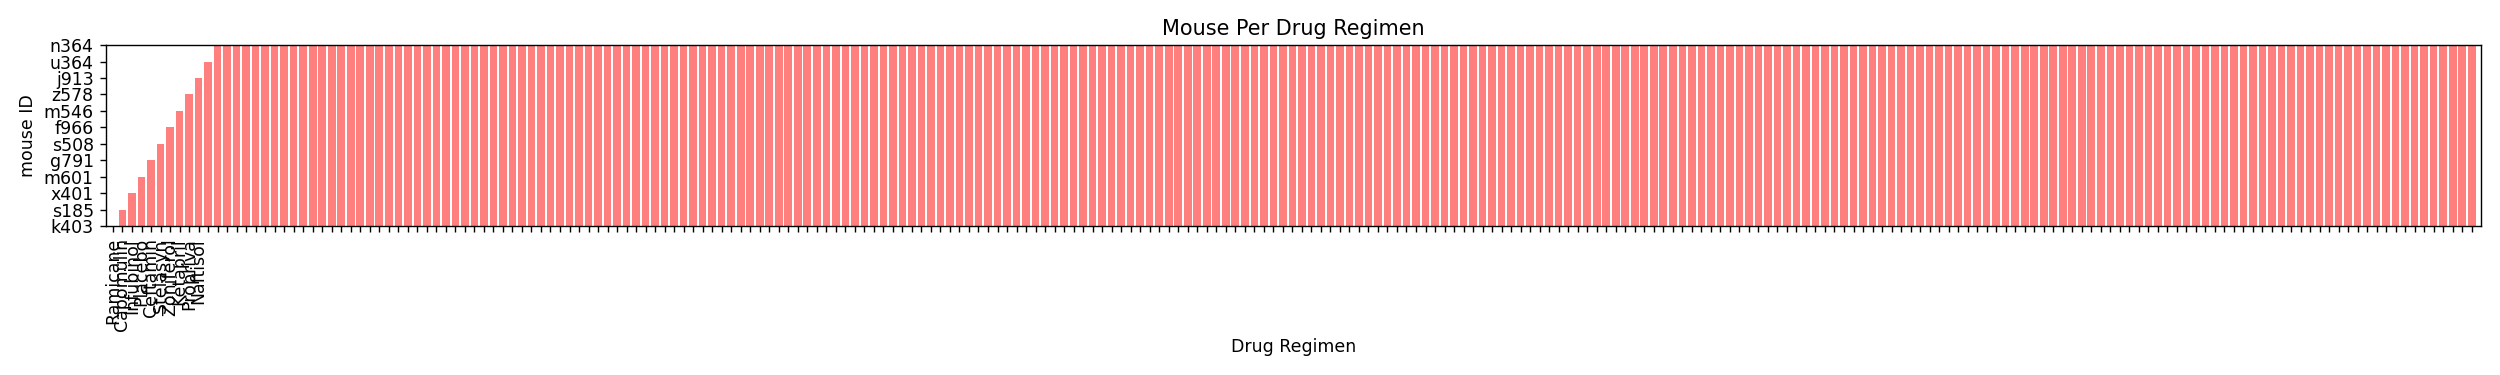

([<matplotlib.axis.XTick at 0x25e0358a280>,
 [Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Naftisol')])

In [52]:
####### Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, new_df["Mouse ID"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, unique_d, rotation="vertical")

In [53]:
####### Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(Mouse_and_Regimen)+10)

(0.0, 11.0)

In [54]:
###### Set a Title and labels
plt.title("Mouse Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("mouse ID")

Text(243.40277777777777, 0.5, 'mouse ID')

In [55]:
###### show the grap
plt.tight_layout()
plt.show()

In [56]:

# Generate a pie plot showing the distribution of female versus male mice using pandas
##### Split up our data into groups based upon 'mouse id' and 'gender'
Mouse_groups = new_df.groupby(['Sex','Mouse ID'])

# Create a new variable that holds the sum of our groups
sum_it_up = Mouse_groups.sum()
sum_it_up.head(40)


Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Sex    Mouse ID                                                          
Female a203              20          23         45           67.973419   
       a251              21          25         45           65.525743   
       a262              17          29         45           70.717621   
       a275              20          28         45           62.999356   
       a366              16          29         30           63.440686   
       a401               8          25         45           66.794156   
       a444              10          25         45           43.047543   
       a457              11          30         10           49.783419   
       a577               6          25         30           57.031862   
       a644               7          17         45           32.978522   
       a699               5          28         45           62.191414   
       a818              12          28         45           74.997764   
       a963              23          27         45           62.765093   
       b128               9          22         45           38.982878   
       b487               6          28         25           56.057749   
       b759              12          25         30           55.742829   
       b879               4          26         45           72.555239   
       c264              11          27         45           67.942121   
       c302              10          29         45           64.575222   
       c326              18          25          5           36.321346   
       c402               1          27         45           74.040390   
       c458              23          20         30           38.342008   
       c559              19          28         45           61.840058   
       c766              13          26         45           69.823146   
       c895               7          29         30           60.969711   
       c927               4          26         40           64.183229   
       d251               8          19         45           37.311236   
       e291              14          29         25           55.138953   
       f129              11          29         15           49.988302   
       f436               3          25         15           48.722078   
       f545              20          26         45           73.324432   
       g107               2          29         35           71.905117   
       g296              14          29         45           68.163195   
       g316              22          22         45           40.159220   
       g867               9          25         15           51.060419   
       g989              21          26         35           62.570880   
       h428               1          27          0           45.000000   
       i334               8          20         45           36.374510   
       i386              23          29         40           67.289621   
       i477               3          30         10           47.520632   

                 Metastatic Sites  
Sex    Mouse ID                    
Female a203                     2  
       a251                     1  
       a262                     4  
       a275                     3  
       a366                     1  
       a401                     4  
       a444                     0  
       a457                     0  
       a577                     2  
       a644                     1  
       a699                     1  
       a818                     2  
       a963                     1  
       b128                     2  
       b487                     1  
       b759                     1  
       b879                     2  
       c264                     2  
       c302                     4  
       c326                     0  
       c402                     3  
       c458                     2  
       c559                     4  
       c

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Gender= ["Male", "Female"]
Distribution = sum_it_up ["Sex"]
colors = ["yellowgreen", "red"]
explode = (0, 0.05)

KeyError: 'Sex'

In [58]:
plt.pie(Distribution, explode=explode, labels=Gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

NameError: name 'Distribution' is not defined

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
